# Voice Scrambler , exercício 8 da disciplina PSC
## Nome : Matheus Araújo de Oliveira     Turma: EEL7062 - 06235A

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
from scipy import signal
import soundfile as sf

In [3]:
def voice_scrambler(audio, sr):
    # carregando o audio
    
    sr_novo = 96000
    y = librosa.resample(audio, orig_sr=sr, target_sr=sr_novo)

    #parametros 
    f_carrier1 = 20000  # Frequência da portadora (Hz)
    f_carrier2 = 25000 # Freqência de corte da 2 portaddra

    numtaps = 1001  # Número de coeficientes do filtro FIR
    cutoff_low = 20000  # Frequência de corte para o filtro passa-baixa (Hz)
    cutoff_high = 20000  # Frequência de corte para o filtro passa-alta (Hz)
    
    #Primeira modulação 
    t = np.arange(len(y)) / sr_novo  # Vetor de tempo para o sinal
    carrier1 = 2 * np.cos(2 * np.pi * f_carrier1 * t)
    y_mod1 = y * carrier1

    # Filtro passa-alta (high-pass)
    highpass_fir = signal.firwin(numtaps, cutoff_high, fs=sr_novo, pass_zero=False)
    filtered_highpass = signal.lfilter(highpass_fir, 1.0, y_mod1)
    
    #Segunda modulação
    t = np.arange(len(filtered_highpass)) / sr_novo  
    carrier2 = 2 * np.cos(2 * np.pi * f_carrier2 * t)    
    y_mod2 = filtered_highpass * carrier2
    
    # Filtro passa-baixa (low-pass)
    lowpass_fir = signal.firwin(numtaps, cutoff_low, fs=sr_novo, pass_zero=True)
    filtered_lowpass = signal.lfilter(lowpass_fir, 1.0, y_mod2)

   
    saida = librosa.resample(filtered_lowpass, orig_sr=sr_novo, target_sr=sr)

    return saida, sr



# Teste 1

Neste teste, foi utilizado um sinal sweep como entrada, com a frequência variando de 10 Hz a 5000 Hz. Foram gerados os espectrogramas do sinal original, do sinal embaralhado, e do sinal reconstruído, permitindo uma análise visual do comportamento do sistema. O sistema inverte as frequências do sinal de entrada (realizando o embaralhamento) e, em seguida, reverte o processo, reconstruindo o sinal original. Os gráficos ilustram claramente as etapas de embaralhamento e restauração de um sinal de áudio

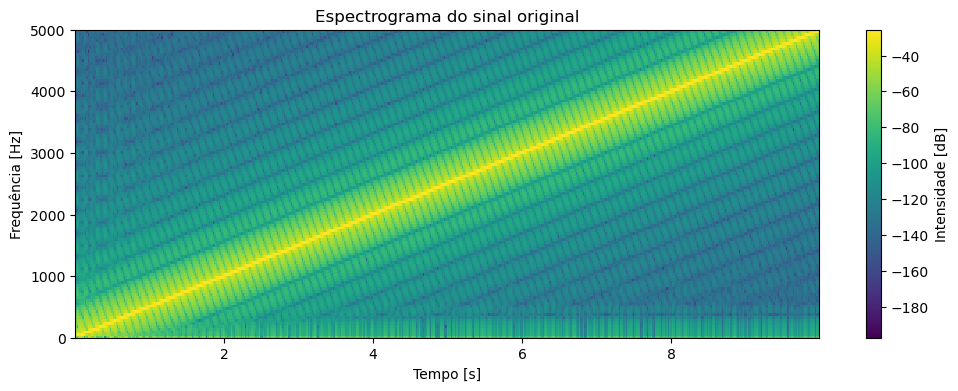

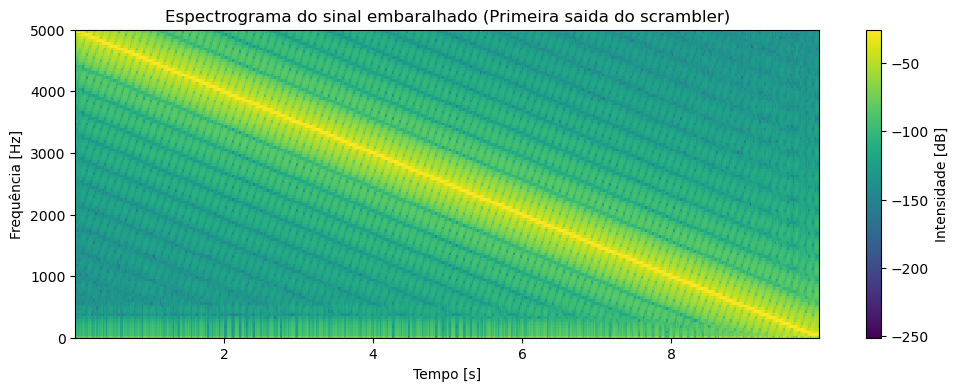

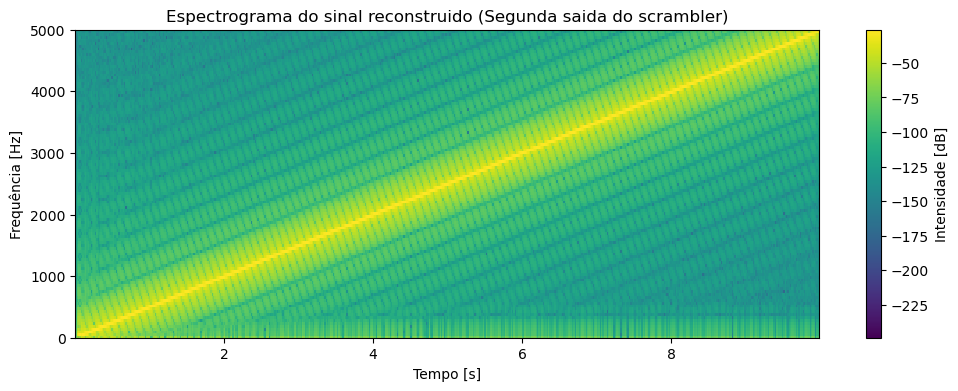

In [4]:
y, sr = librosa.load("data/sweep.wav", sr=None)


saida_1, sr =voice_scrambler(y, sr)

saida_2, sr =voice_scrambler(saida_1, sr)

nperseg =1024

# Calcular e plotar o espectrograma (SFFT)
frequencies, times, Sxx = signal.spectrogram(y, sr, nperseg=nperseg)

plt.figure(figsize=(12, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title('Espectrograma do sinal original')
plt.colorbar(label='Intensidade [dB]')
plt.ylim(0, 5000)  # Frequências entre 0 e 5000 Hz (5 kHz)
plt.show()



# Calcular e plotar o espectrograma (SFFT)
frequencies, times, Sxx = signal.spectrogram(saida_1, sr, nperseg=nperseg)

plt.figure(figsize=(12, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title('Espectrograma do sinal embaralhado (Primeira saida do scrambler)')
plt.colorbar(label='Intensidade [dB]')
plt.ylim(0, 5000)  # Frequências entre 0 e 5000 Hz (5 kHz)
plt.show()

# Calcular e plotar o espectrograma (SFFT)
frequencies, times, Sxx = signal.spectrogram(saida_2, sr, nperseg=nperseg)

plt.figure(figsize=(12, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title('Espectrograma do sinal reconstruido (Segunda saida do scrambler)')
plt.colorbar(label='Intensidade [dB]')
plt.ylim(0, 5000)  # Frequências entre 0 e 5000 Hz (5 kHz)
plt.show()




# Teste 2

Neste teste, utilizou-se um sinal de áudio com taxa de amostragem de 48 kHz. Foram reproduzidos o áudio original, o áudio embaralhado e o áudio reconstruído, permitindo uma comparação clara entre as diferentes etapas do processamento. Através dessa análise, pode-se confirmar que o algoritmo desenvolvido alcançou seu objetivo, realizando com sucesso tanto o embaralhamento quanto a reconstrução do sinal de áudio.

In [5]:
original_audio_path = "data/voz1.wav"
saida1_path = "data/sinal_embaralhado.wav"
saida2_path = "data/sinal_reconstruido.wav"

y, sr = librosa.load(original_audio_path, sr=None)

saida_1, sr =voice_scrambler(y, sr)
saida_2, sr =voice_scrambler(saida_1, sr)

sf.write(saida1_path, saida_1, sr)
sf.write(saida2_path, saida_2, sr)


## Áudio Original:

In [6]:
Audio(original_audio_path)

## Áudio Embaralhado:

In [7]:
Audio(saida1_path)


## Áudio Reconstruido:

In [8]:
Audio(saida2_path)

# Teste 3

Gerando os espectrogramas para o sinal de voz.

O sinal de voz não foi 


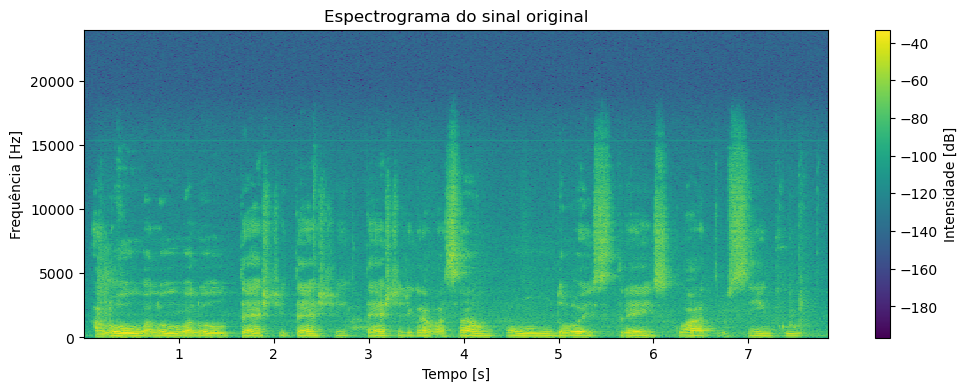

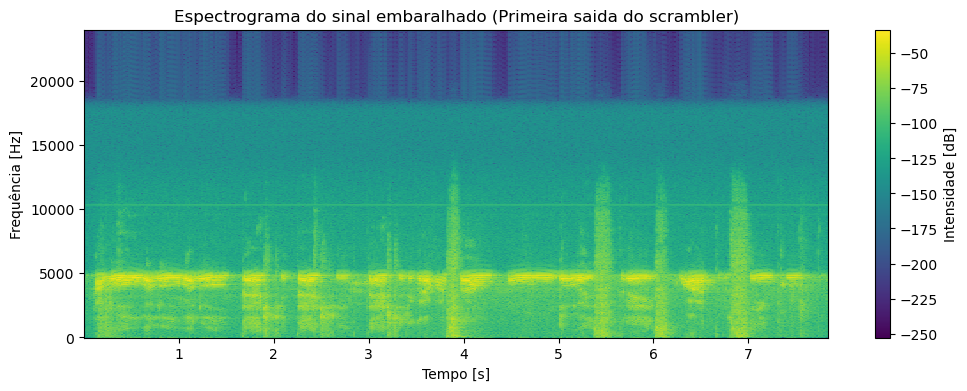

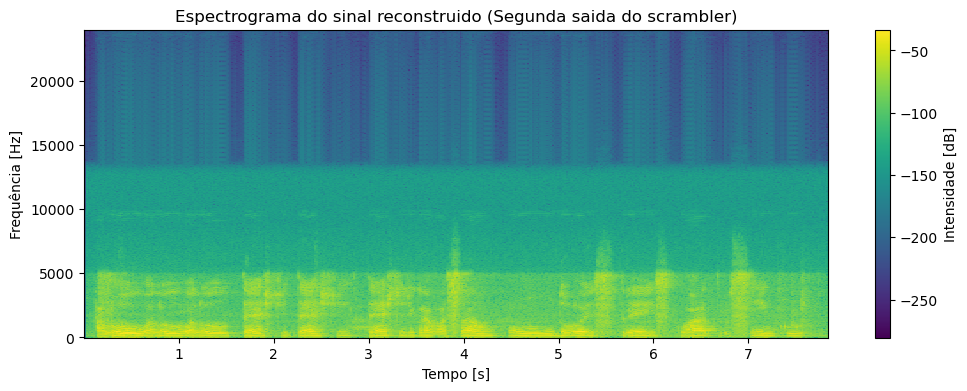

In [12]:
y, sr = librosa.load("data/voz1.wav", sr=None)

saida_1, sr =voice_scrambler(y, sr)

saida_2, sr =voice_scrambler(saida_1, sr)

nperseg =1024

# Calcular e plotar o espectrograma (SFFT)
frequencies, times, Sxx = signal.spectrogram(y, sr, nperseg=nperseg)

plt.figure(figsize=(12, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title('Espectrograma do sinal original')
plt.colorbar(label='Intensidade [dB]')
plt.show()



# Calcular e plotar o espectrograma (SFFT)
frequencies, times, Sxx = signal.spectrogram(saida_1, sr, nperseg=nperseg)

plt.figure(figsize=(12, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title('Espectrograma do sinal embaralhado (Primeira saida do scrambler)')
plt.colorbar(label='Intensidade [dB]')
plt.show()

# Calcular e plotar o espectrograma (SFFT)
frequencies, times, Sxx = signal.spectrogram(saida_2, sr, nperseg=nperseg)

plt.figure(figsize=(12, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequência [Hz]')
plt.xlabel('Tempo [s]')
plt.title('Espectrograma do sinal reconstruido (Segunda saida do scrambler)')
plt.colorbar(label='Intensidade [dB]')
plt.show()